In [1]:
!python -m pip install matplotlib
!python -m pip install seaborn
!python -m pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.1/7.1 MB 481.7 kB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=62e32a116aa250e01618248e3fbe2215fdfc6723a1c439926f8ee36ecc8d4434
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Load the Boston House Pricing Dataset

In [6]:
from sklearn.datasets import load_boston

In [21]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Preparing the dataset

In [17]:
dataset = pd.DataFrame(load_boston().data, columns = load_boston().feature_names )

In [18]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
#add the target price column
dataset['Price'] = load_boston().target

In [27]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
#Checking missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [68]:
#identify how many unique variable is hold by each feature
[(feature,  len(dataset[feature].unique())) for feature in dataset.columns]

[('CRIM', 504),
 ('ZN', 26),
 ('INDUS', 76),
 ('CHAS', 2),
 ('NOX', 81),
 ('RM', 446),
 ('AGE', 356),
 ('DIS', 412),
 ('RAD', 9),
 ('TAX', 66),
 ('PTRATIO', 46),
 ('B', 357),
 ('LSTAT', 455),
 ('Price', 229)]

### Exploratory Data Analysis

<AxesSubplot:>

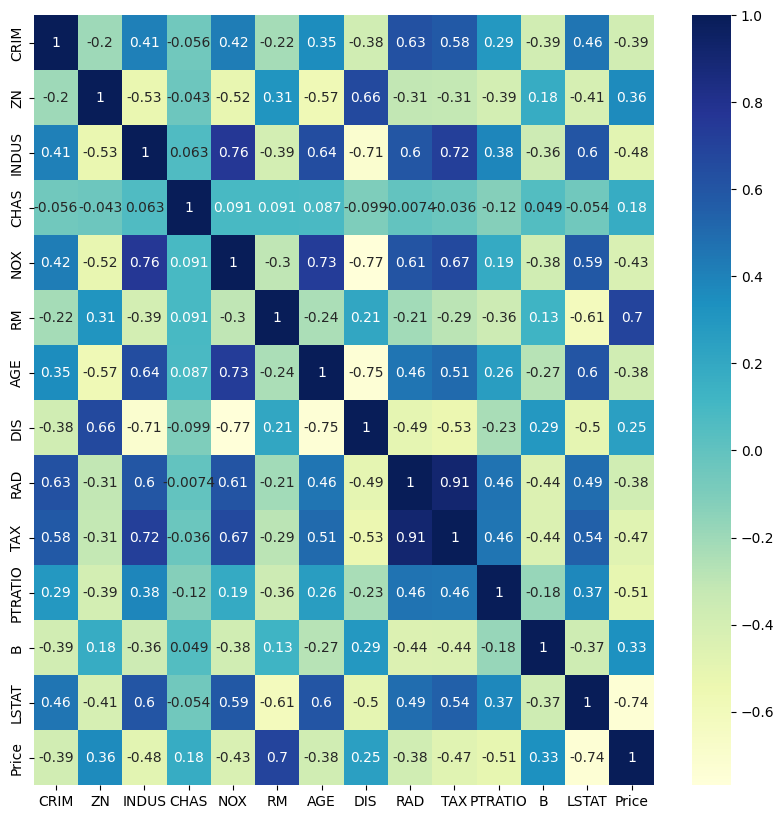

In [47]:
# Correlation
dataset.corr()
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), cmap = "YlGnBu", annot = True)

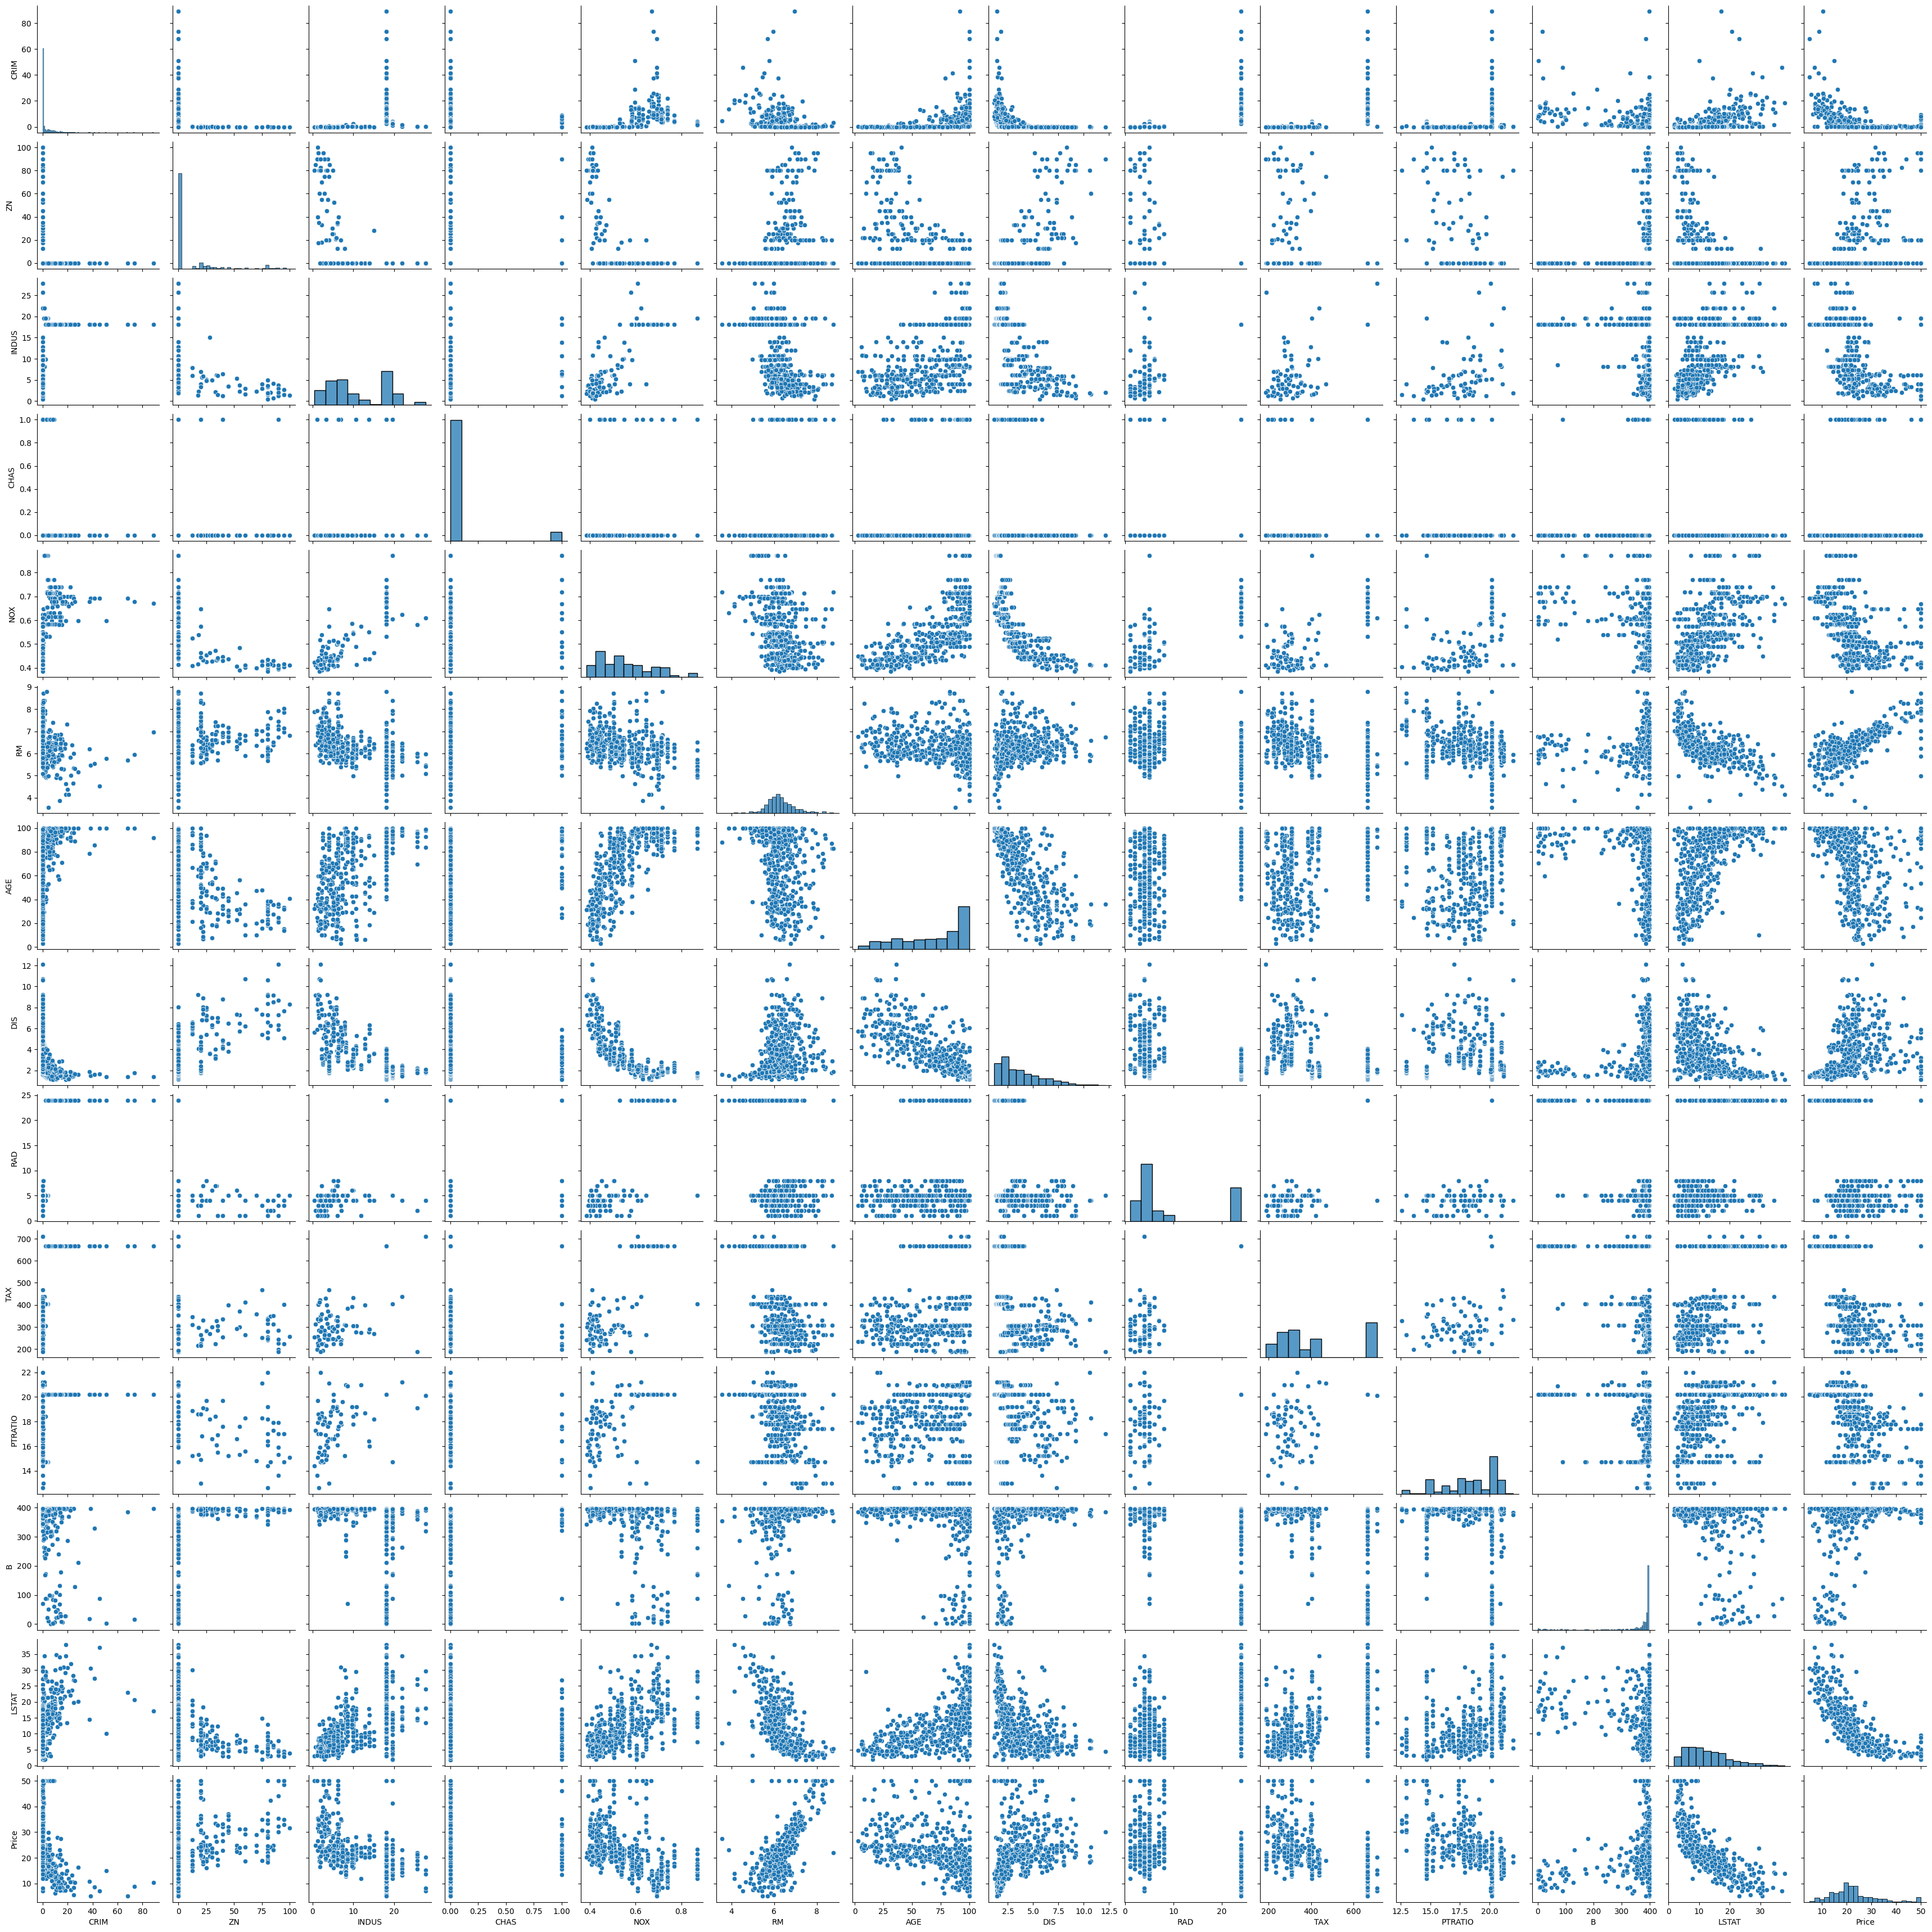

In [43]:
sns.pairplot(dataset)

In [44]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


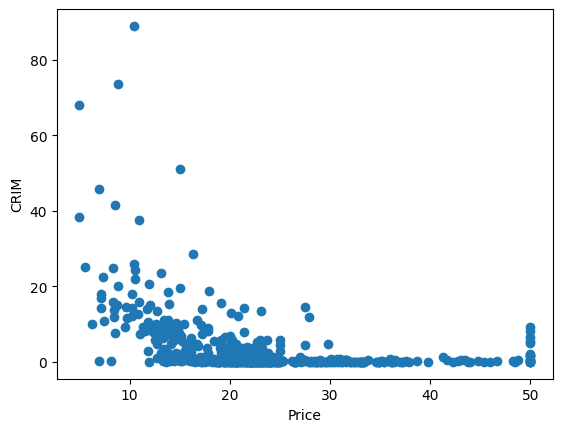

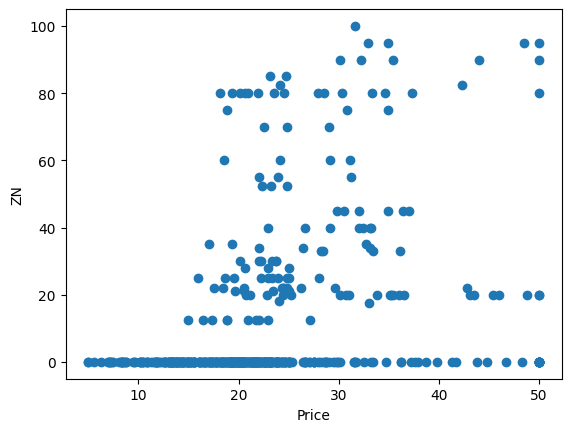

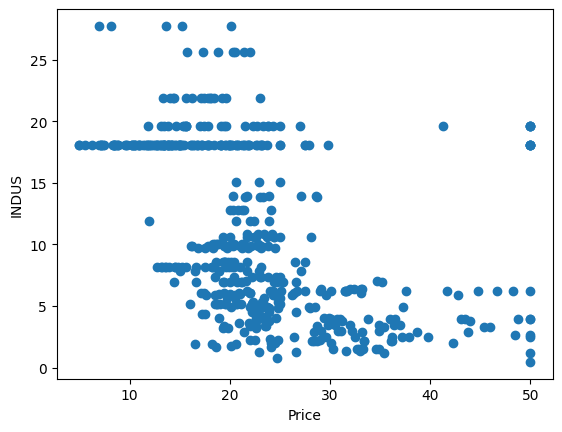

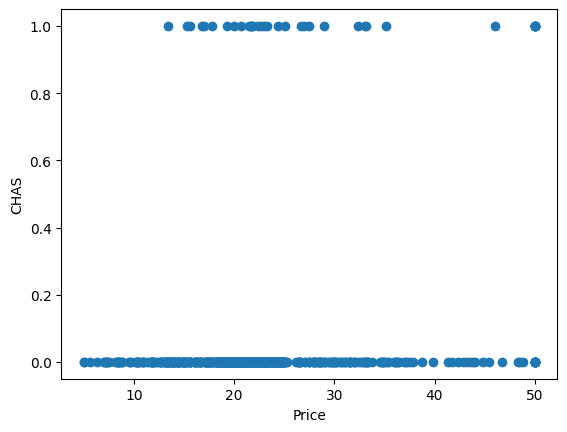

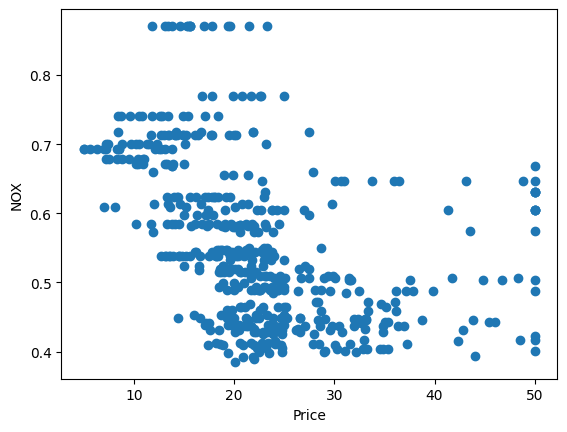

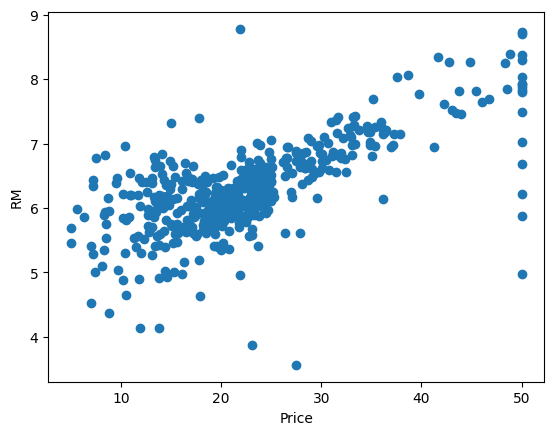

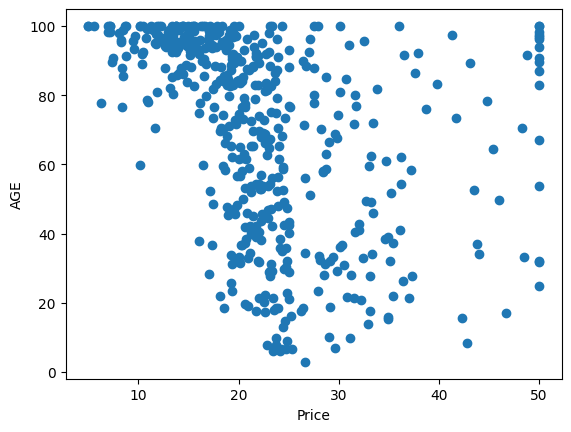

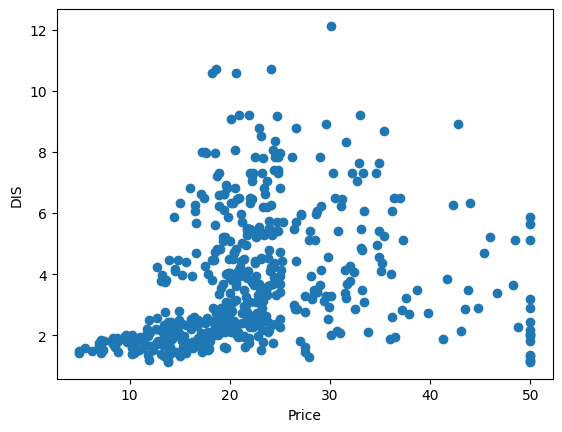

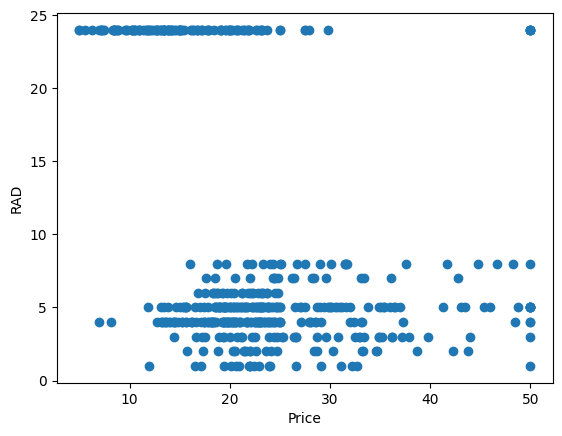

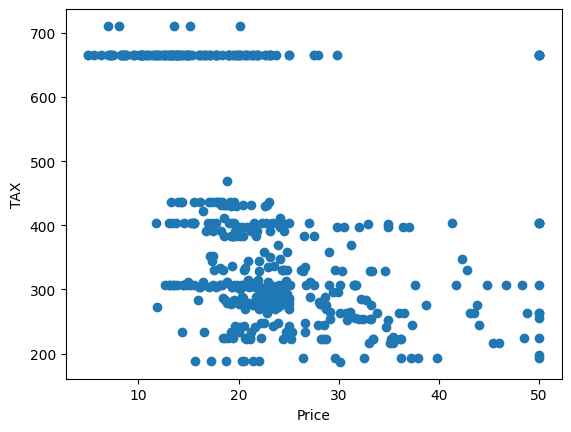

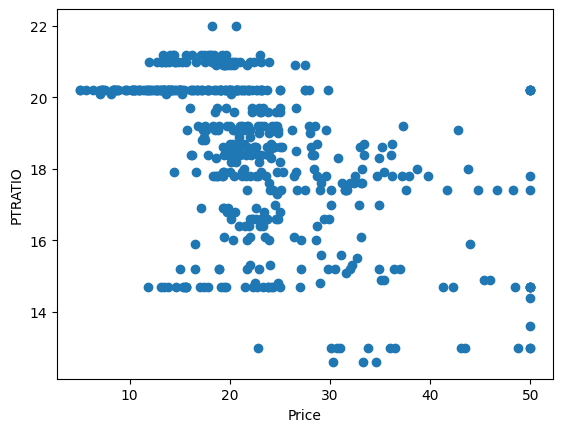

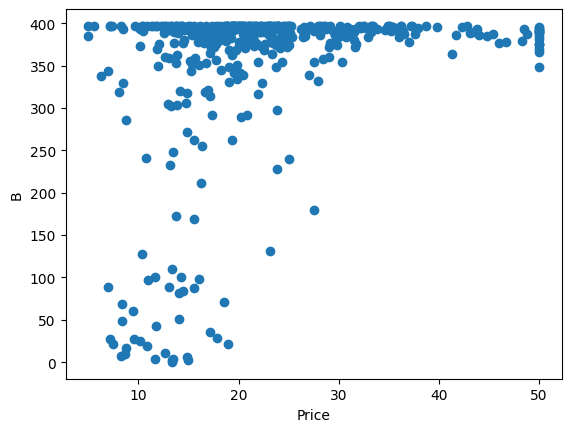

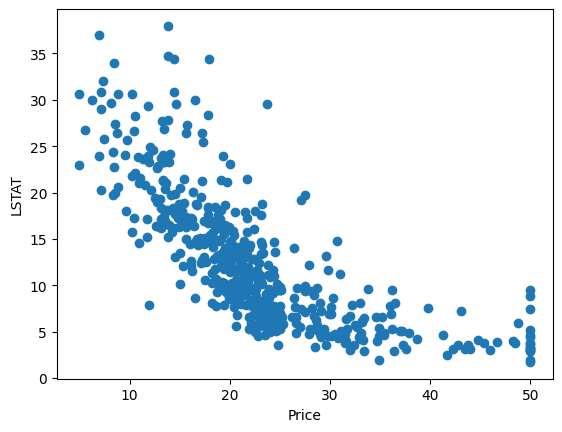

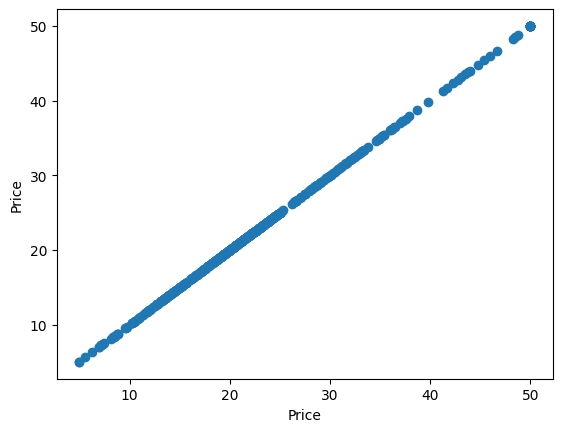

In [49]:
for feature in dataset.columns:
    plt.scatter(dataset['Price'], dataset[feature])
    plt.ylabel(feature)
    plt.xlabel('Price')
    plt.show()

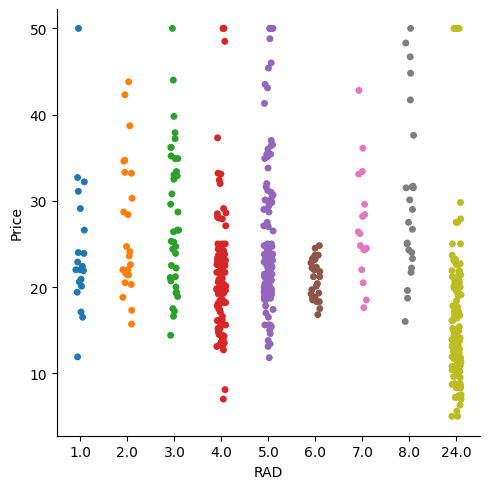

In [70]:
sns.catplot(data = dataset, y = 'Price', x = 'RAD')

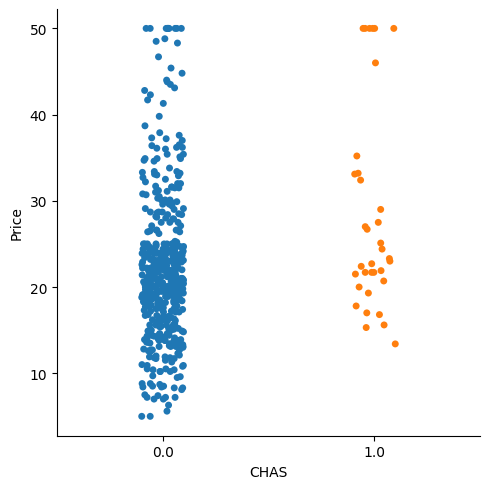

In [71]:
sns.catplot(data = dataset, x = 'CHAS', y = 'Price')

In [96]:
sig_corr = dataset.corr()[abs(dataset.corr()['Price'])>0.4]['Price'].index

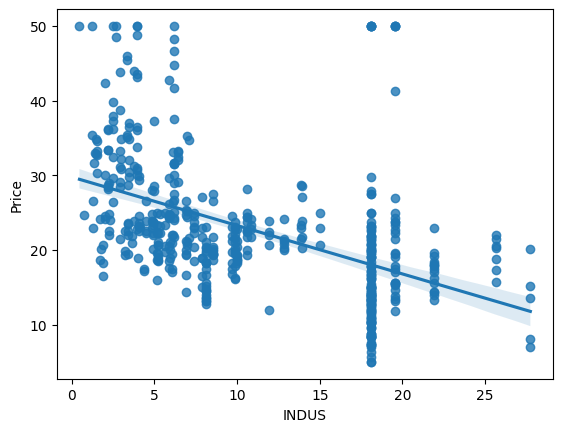

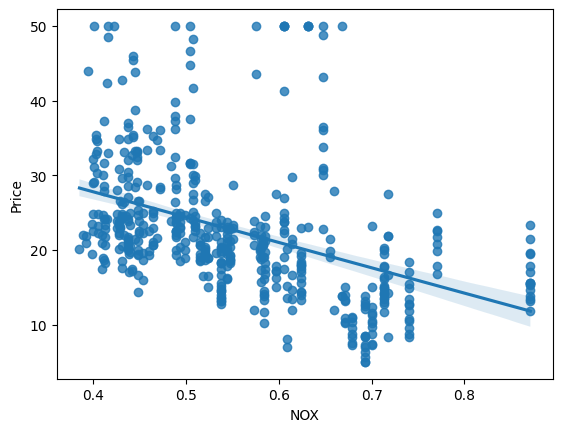

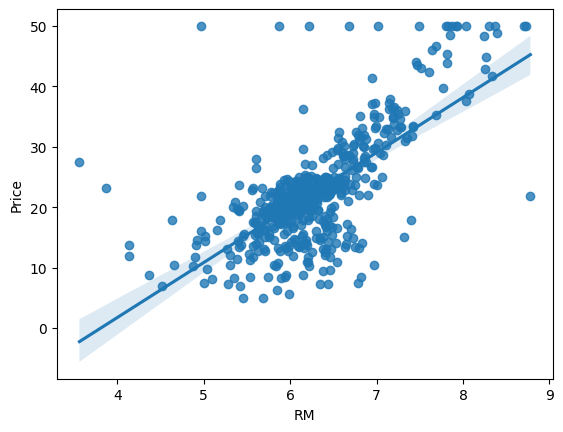

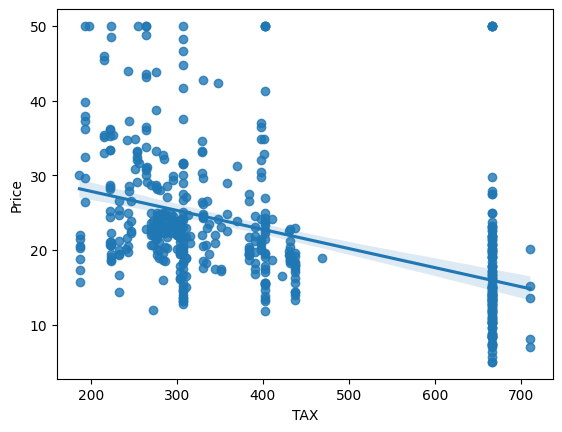

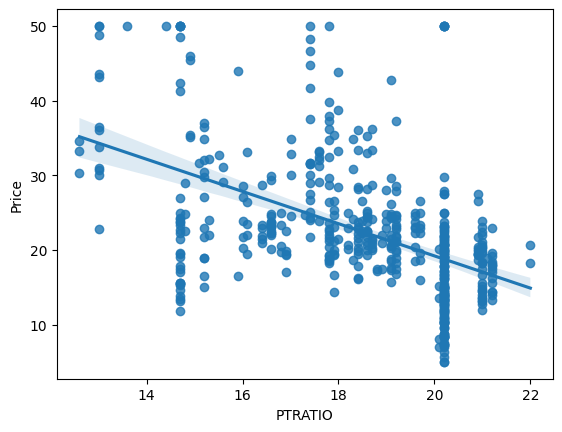

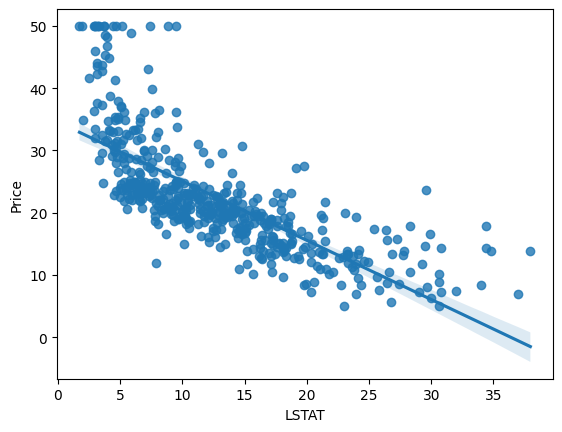

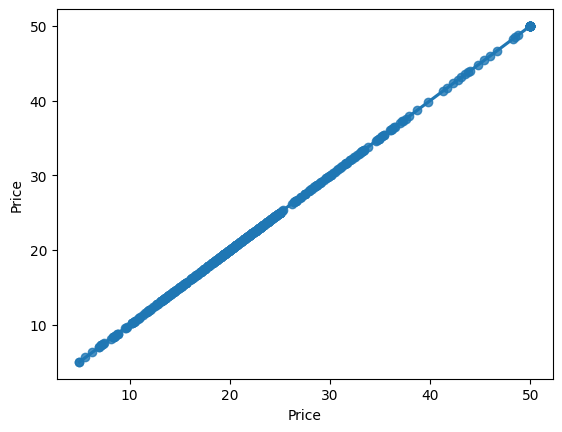

In [100]:
for feature in sig_corr:
    sns.regplot(data = dataset, x = feature, y= 'Price') 
    plt.show()

In [103]:
print(dataset['Price'].value_counts)
print(dataset.shape)

<bound method IndexOpsMixin.value_counts of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64>
(506, 14)


In [105]:
#Independent and dependent features
X = dataset.iloc[:,0:13]
y = dataset.iloc[:, 13]

In [106]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 23)

In [110]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56


In [112]:
y_train.head()

175    29.4
225    50.0
61     16.0
13     20.4
188    29.8
Name: Price, dtype: float64

In [113]:
#Standardize the dataset with StandardScaler fit_transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.fit_transform(X_test)

### Pickle the standard scaling process

In [117]:
import pickle

In [118]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [155]:
scaling_model = pickle.load(open('scaling.pkl', 'rb'))

In [172]:
scaling_model.transform(load_boston().data[9].reshape(1,-1))

array([[-0.05485,  0.     ,  0.     ,  0.     ,  0.     , -0.373  ,
        -8.4    ,  0.2454 ,  0.     ,  0.     ,  0.     , -5.81   ,
        -3.35   ]])

### Model Training

In [121]:
from sklearn.linear_model import LinearRegression


In [122]:
regression = LinearRegression()

In [123]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Get model parameters

In [124]:
##Print the coefficient and intercept
print(regression.coef_)

[-0.83324131  1.06806852  0.10120867  0.8526869  -2.24617776  2.50534445
  0.14075282 -3.10875131  2.38399309 -1.65525639 -1.91042436  0.88987647
 -3.9779892 ]


In [125]:
print(regression.intercept_)

22.56361386138614


In [126]:
#On which parameters the model has been trained 
print(regression.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [128]:
##Prediction with test data
y_pred = regression.predict(X_test)

### Assumptions

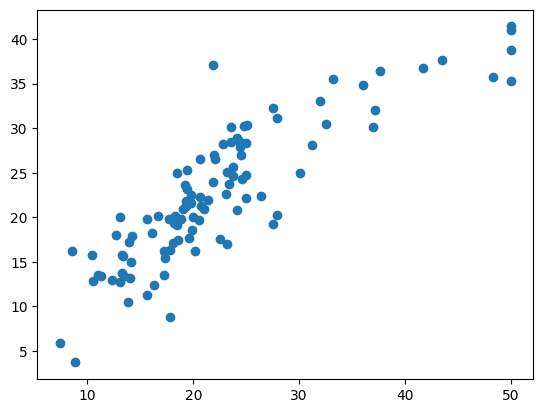

In [129]:
plt.scatter(y_test, y_pred)

In [130]:
residuals = y_test- y_pred

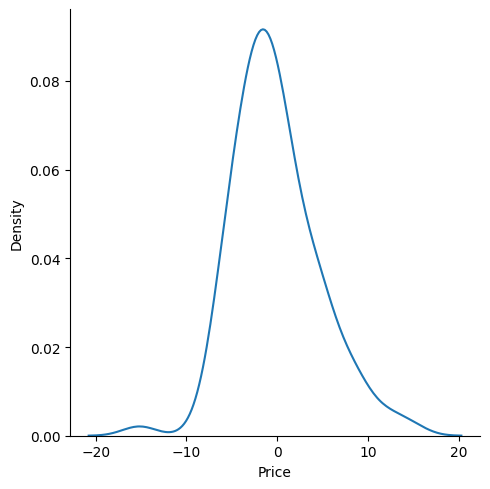

In [131]:
sns.displot(residuals, kind = "kde")

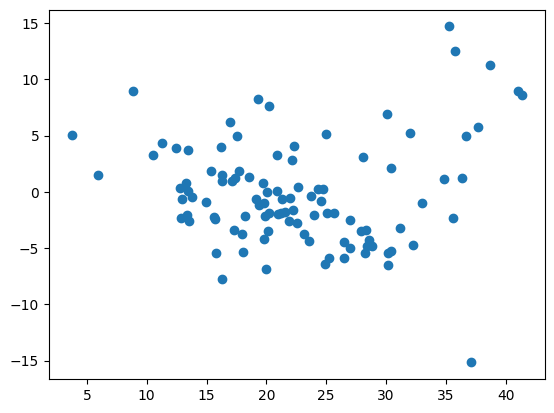

In [132]:
#Scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(y_pred, residuals)

### Evaluate the model with mean square and absolute error


In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.6081184750847077
21.968556365855456
4.687062658622717


### R Square and adjusted R square

Formula
##### R^2 = 1- SSR/SST
R^2 = coefficient of determination SSR = sum of square residuals

SST = Total Sum of Squares

In [135]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7449679474026711


#### Adjusted R2 = 1- [(1-R2)*(n-1)/(n-k-1)]

where
R2 = The R2 of the model

n = the number of observations

k = the number of predictor variables

In [139]:
#Calculate the adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

0.7072927578144294

### New data prediction

In [145]:
load_boston().data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [147]:
#transform the new data this is one way
scaler.transform(load_boston().data[0].reshape(1,-1))# reshape for making data 2 dimensional as we used in model data

array([[-0.40251216,  0.27535573, -1.3105401 , -0.25      , -0.30269156,
         0.29929235, -0.29782933,  0.28477306, -1.0032551 , -0.68991655,
        -1.34802599,  0.50224404, -1.08370901]])

In [148]:
regression.predict(scaler.transform(load_boston().data[0].reshape(1,-1)))

array([29.4332683])

###  Pickling the model file for deployment

In [149]:
import pickle

In [150]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [151]:
pickled_regmodel = pickle.load(open('regmodel.pkl', 'rb'))

### Predict the new data with pickled model


In [152]:
pickled_regmodel.predict(scaler.transform(load_boston().data[0].reshape(1,-1)))

array([29.4332683])